In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random
import time
import matplotlib.pyplot as plt

In [2]:
def cifar_loaders(batch_size, shuffle_test=False):
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train = datasets.CIFAR10('~/data/cifar10', train=True, download=True,
                             transform=transforms.Compose([
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomCrop(32, 4),
                                 transforms.ToTensor(),
                                 normalize,
                             ]))
    test = datasets.CIFAR10('~/data/cifar10', train=False,
                            transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
                                               shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
                                              shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader


In [3]:
batch_size = 64
test_batch_size = 64

train_loader, _ = cifar_loaders(batch_size)
_, test_loader = cifar_loaders(test_batch_size)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
# for i, (image, labels) in enumerate(train_loader):
#     break
# type(image), image.shape, labels


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


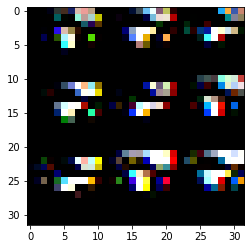

In [6]:
# sample_image = image[0]
# plt.imshow(sample_image.view(sample_image.shape[2], sample_image.shape[1], sample_image.shape[0]))

In [7]:
from models import MLP, mlp_preprocessing, CNN, cnn_preprocessing
from tqdm import trange
from tqdm.auto import tqdm

In [8]:
# mlp = MLP(3*32*32, 10)
# cnn = CNN(3*32*32, 10)

In [ ]:
# t_image = Variable(image.view(-1, 3*32*32))
# t_image.shape

In [ ]:
# image.reshape(-1, 1024).shape

In [ ]:
# cnn(image).shape

In [14]:
model = CNN(3*32*32, 10)
preprocessing_fn = cnn_preprocessing

device = torch.device(
    'cuda:0') if torch.cuda.is_available() else torch.device('cpu')
loss_fn = torch.nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=1e-3)
# with trange(3, desc="Training", unit="epoch") as bar:
model.to(device)
for epoch in range(3):
    loss_history = []
    correct = 0
    with tqdm(train_loader) as bar:
        bar.set_description(f'Train batch {epoch}')
        for i, (images, labels) in enumerate(bar):
            num_pictures = images.shape[0]
            # images = Variable(images.view(-1, 3*32*32)).to(device)
            # labels = labels.to(device)
            images, labels = preprocessing_fn(images, labels)
            images, labels = images.to(device), labels.to(device)
            ## Prediction
            output = model(images)
            loss = loss_fn(output, labels)
            
            predictions = output.argmax(dim=1).squeeze()
            correct_in_batch = (predictions == labels).sum().item()
            accuracy = correct_in_batch / num_pictures
            correct += correct_in_batch

            loss.backward()
            opt.step()
            opt.zero_grad()

            loss_history.append(loss.cpu().detach().numpy())
            # current_total_loss = np.mean(loss_history)
            bar.set_postfix(batch_loss=loss.item(), accuracy=accuracy)
            if i == len(train_loader) - 1:
                bar.set_postfix(
                    Accuracy=correct/len(train_loader.dataset), Total_loss=np.mean(loss_history))
        
        # print(f"Epoch {epoch}, Accuracy {correct / len(train_loader.dataset)}, Total loss {np.mean(loss_history)}")
        # bar.set_description(f'Train epoch {epoch}')
        # bar.set_postfix(total_loss=np.mean(loss_history), accuracy=accuracy)
    
        


  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]